
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> 07. Deep Neural Networks (DNN): Regression and Classification </center>



## <span style="color:red"> Outline </span> 
1. **Activations, optimizers and other tricks**
2. **DNN in regression: applications**
3. **DNN in classification: applications**



In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/ai-2-uis-student')
print(os.getcwd())

In [ ]:
#@title Load libraries { display-mode: "form" }
#@markdown Here is important to change to GPU  


import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf

#**1. Activations, optimizers and other tricks**

- ### **Activation functions**

Introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn non linear representations.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/actifunc.png" width="400" >



Function                                          | $f(x)$|  $\frac{\partial f(x)}{\partial x}$
:---------------------------------------------------: | |:---------------------------------------------------:
                                                       | 
**Sigmoid**  |  $$\large \frac{1}{1 + e^{-x}}$$   | $$\large f(x)(1-f(x))$$|
**Tanh**| $$\large \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$|$$\large (1-(f(x)^{2})$$|
**ReLU**| $$\large \max(0.01x, x)$$|$$\large \left\{\begin{matrix}
0.01 & \text{if} & x<0 \\ 
1    & \text{if} &  x>0
\end{matrix}\right.$$|

[Keras activations](https://keras.io/api/layers/activations/)


- ### **Optimizers**

  -   **Stochastic gradient descent (SGD):** uses a single data sample randomly selected to calculate gradient descent and update weights at every iteration. 
  -  **Mini-batch gradient:** uses a mini-batch of samples, randomly selected at each iteration. Converge faster and it more stable than SGD
 
  - **Momentum** compute speed of gradient and  helps accelerate SGD in the relevant direction: 

  $$
\begin{matrix}
\upsilon_t := \gamma\upsilon_{t-1} +\eta \frac{\partial \mathbf{J(W)}}{\partial W}
\\ 
\\
W_{i,j}^{l} := W_{i,j}^{l} - \upsilon_t 
\end{matrix}$$

  - **AdaGrad Optimizer:** Change learning rate parameter according to sparsity of data. Then smaller updates are performed for frequently features.  $W_{i,j}^{l} := W_{i,j}^{l}  - \frac{\eta}{\sqrt{\partial J + \epsilon}} \frac{\partial \mathbf{J(W)}}{\partial W}$ 
     
  - **Adadelta Optimizer:** $W_{i,j}^{l} := W_{i,j}^{l}  - \frac{\eta}{\sqrt{(1-\gamma )\partial J_{t-1} +  \gamma\partial J_t +\epsilon}} \frac{\partial \mathbf{J(W)}}{\partial W}$
  
  - **RMSprop:**  divides the learning rate by an exponentially decaying average of squared gradients [RMSprop-Hinton](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)

 - **Adam:** **Ada**ptive **M**oment Estimation computes adaptive learning rates for each parameter

  $$
\begin{matrix}
m_t := \beta_1m_{t-1} +(1-\beta_1) \frac{\partial \mathbf{J(W)}}{\partial W}
\\ 
\\
\upsilon_t := \beta_2\upsilon_{t-1} +(1-\beta_2) \frac{\partial \mathbf{J(W)^{2}}}{\partial W}
\\
\\
W_{i,j}^{l} := W_{i,j}^{l} - \frac{\eta }{\sqrt{\upsilon_t+\epsilon}}\hat{m}_t 
\end{matrix}$$

where $m_t, \upsilon_t$ approximates the mean and variance, respectively. In same sense, there exist many other approximations like **AMSGrad, Nadam, Adadelta, ...**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/optmized_simul.gif" width="400" >


[Simulation](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/)

# **2. DNN in regression: applications**

Now, we goint to use all these concepts to deal with real machine learning problems. Firstly, we will load the well know `boston_housing`



In [ ]:
import tensorflow as tf
dataset = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)
[x_train, y_train], [x_test, y_test] = dataset
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Bult a DNN of four layers, with activation relu. 
  - Define three dense hidden layers of 64 neurons
  - In output layer **Remember** that is a regression problem. 
  - Use optimized `RMSprop(0.001)`
  - compile loss as `mse`



In [ ]:
#@title **code** change layers and parameters!
def build_model():
  model = tf.keras.Sequential([
    # It is necessary to specify the input dimensions in the first layer                         
    tf.keras.layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    # A neuron for regression problems with linear activation
    tf.keras.layers.Dense(1)
  ])

  # Choose the preference optimizer.
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  #Select the loss function (MSE)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model();
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


Train your model

In [ ]:
#@title **code:** train the model
iterations = 100
history = model.fit(x_train, y_train, epochs=iterations,  validation_split = 0.2)

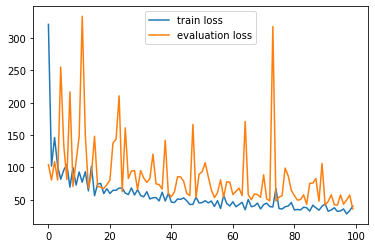

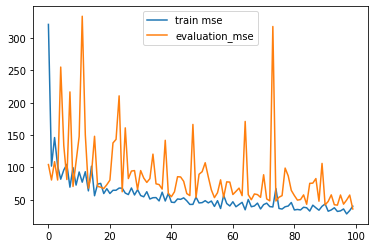

In [ ]:
#@title **code:** plot performance of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['mse'], label='train mse');
plt.plot(history.history['val_mse'], label='evaluation_mse');
plt.legend()
plt.show()

In [ ]:
#@title **code:** evaluate the model
loss, mae, mse = model.evaluate(x_test, y_test)
loss, mae, mse

4/4 [==============================] - 0s 2ms/step - loss: 33.2195 - mae: 3.9296 - mse: 33.2195


(33.219478607177734, 3.9295639991760254, 33.219478607177734)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, change the layers, optimizer, activations and get a better result!


# **3. DNN in classification: applications**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DNN_5.png" width="400" >

In this case, we use a one hot encoding to give an answer. So, each neuron respond to a specific class and in last layer sigmoids are implemented. 

Now, we going to test the power of DNN in non-linear data. We going to load the next data: 


X:  (10000, 2)  Y:  (10000,)
(7000, 2) (3000, 2) (7000,) (3000,)
categorical y_train:  (7000, 2)
categorical y_test:  (3000, 2)


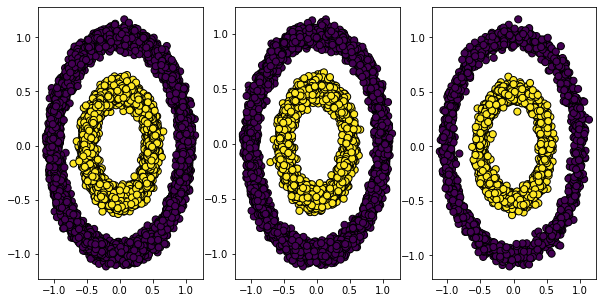

In [ ]:
#@title **code** we can deal with Non linear boundaries!


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=10000, factor=0.5, random_state=0, noise=0.05)
print("X: ", X.shape, " Y: ", Y.shape)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)



fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, edgecolor='k')
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, edgecolor='k')
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, edgecolor='k')


y_test = tf.keras.utils.to_categorical(y_test, num_classes=2, dtype='float32')
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2, dtype='float32')
print("categorical y_train: ", y_train.shape)
print("categorical y_test: ", y_test.shape)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement DNN of above figure for the above toy dataset. 
- Use relu for hidden layer

In [ ]:
#@title **code student:** built DNN architecture
model = tf.keras.Sequential([
                             



model.summary()                            

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


- Use an Adam optimizer
- Use a loss `'binary_crossentropy'`
- metrics should be `['binary_accuracy']`



In [ ]:
 #@title **code student** train the model
model.compile(     
    

)

In [ ]:
#@title **code** train the model
history = model.fit(
    x_train, y_train,
    epochs=150, 
    validation_split = 0.2, 
    verbose=False)

In [ ]:
#@title **code** evaluate the model
loss, acc = model.evaluate(x_test, y_test)
loss, acc

94/94 [==============================] - 0s 2ms/step - loss: 0.4202 - binary_accuracy: 0.8007


(0.42018136382102966, 0.8006666898727417)

[1 0 1 ... 0 0 0]
(3000, 2)
(3000,)


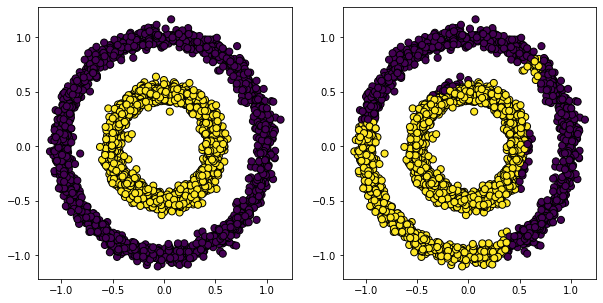

In [ ]:
#@title **code** drawn the prediction of the model..should be almost perfect!
y_estimated = model.predict_classes(x_test)
print(y_estimated)
print(y_test.shape)
print(np.argmax(y_test ,axis=-1).shape)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(y_test ,axis=1), s=50, edgecolor='k')
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_estimated, s=50, edgecolor='k')

Now , we are going to work in a more real dataset. We we load the Breast cancer dataset








,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


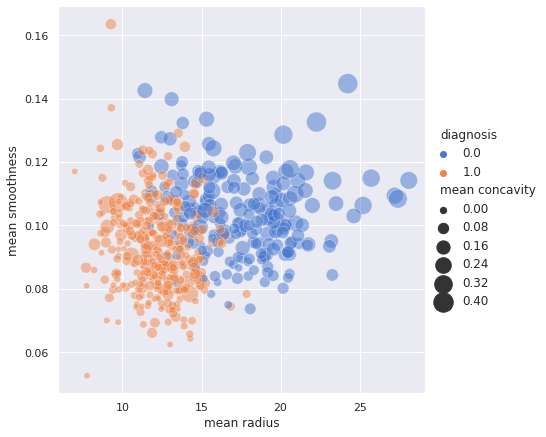

In [ ]:
#@title **code: Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import io
import requests
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()

cancer = load_breast_cancer()

cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **code**  select the features 
# Indicate the classification variable
Y = cancer.target
Y = tf.keras.utils.to_categorical(Y, num_classes=2, dtype='float32')
# Concatenate to form the training data
X = cancer.data

In [ ]:
#@title **code**  split data
from sklearn.model_selection import train_test_split
print(X.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(569, 30) (569, 2)


((398, 30), (171, 30), (398, 2), (171, 2))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement DNN for leaf_class_1.csv 
- Use almost three hidden layers
- **Remember** that is a classification problem to implement last layer
- Use any optimizer as you prefer
- Compile with `binary_accuracy`



In [ ]:
#@title **code** fit the model
iterations = 10
  
history = model.fit(
  x_train, y_train,
  epochs=iterations, 
  validation_split = 0.2, verbose=False)

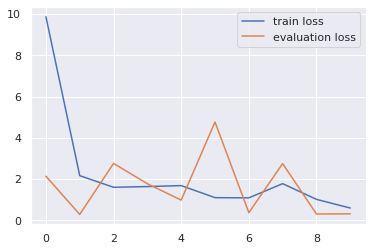

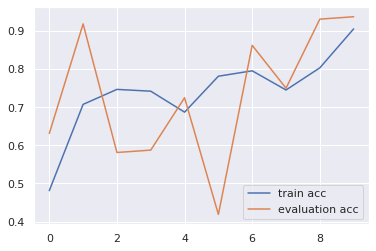

In [ ]:
#@title **code** plots
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss');
plt.plot(history.history['val_loss'], label='evaluation loss');
plt.legend()
plt.show();

plt.plot(history.history['binary_accuracy'], label='train acc');
plt.plot(history.history['val_binary_accuracy'], label='evaluation acc');
plt.legend()
plt.show()

In [ ]:
#@title **code** evaluate the model in testing set
loss, acc = model.evaluate(x_test, y_test)
loss, acc

6/6 [==============================] - 0s 2ms/step - loss: 0.3454 - binary_accuracy: 0.9006


(0.3454206883907318, 0.9005848169326782)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

A main challenge on data analysis is related with image classification. There exist a family of `mnist` datasets that could be used to play in this domain. 

- Implement a DNN for `mnist` dataset. You can use `fashion-mnist` or `digit-mnist`

- Report the scores. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/ANNs.gif" width="400" >


# References

[1. How the backpropagation algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)

[2. **Momentum** Qian, N. (1999). On the momentum term in gradient descent learning algorithms. Neural Networks : The Official Journal of the International Neural Network Society, 12(1), 145–151.](http://doi.org/10.1016/S0893-6080(98)00116-6)

[3. Keras activations](https://keras.io/api/layers/activations/)

[4. Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. Journal of Machine Learning Research, 12, 2121–2159 ](http://jmlr.org/papers/v12/duchi11a.html)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">